<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/ML_Regression/MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
df_bike_cnt = pd.read_csv('hour.csv')


print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
df_bike_cnt.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_bike_cnt.tail(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17329,17330,2012-12-29,1,1,12,22,0,6,0,2,0.26,0.2424,0.60,0.4627,3,51,54
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0000,0,32,32
17331,17332,2012-12-30,1,1,12,0,0,0,0,2,0.26,0.2576,0.60,0.1642,0,41,41
17332,17333,2012-12-30,1,1,12,1,0,0,0,2,0.26,0.2273,0.56,0.4179,1,27,28
17333,17334,2012-12-30,1,1,12,2,0,0,0,2,0.26,0.2424,0.56,0.2836,0,19,19
17334,17335,2012-12-30,1,1,12,3,0,0,0,2,0.26,0.2273,0.56,0.4179,1,14,15
17335,17336,2012-12-30,1,1,12,4,0,0,0,2,0.26,0.2576,0.56,0.2239,0,7,7
17336,17337,2012-12-30,1,1,12,5,0,0,0,2,0.26,0.2273,0.48,0.2985,0,2,2
17337,17338,2012-12-30,1,1,12,6,0,0,0,2,0.24,0.1970,0.52,0.4179,1,7,8
17338,17339,2012-12-30,1,1,12,7,0,0,0,1,0.24,0.2121,0.56,0.3582,0,13,13


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
df_bike_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*Checking for Null Values*

In [ ]:
# Find % of missing values in each column
round(100*(df_bike_cnt.isnull().sum()/len(df_bike_cnt)), 4).sort_values(ascending=False)

instant       0.0
weathersit    0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
workingday    0.0
dteday        0.0
weekday       0.0
holiday       0.0
hr            0.0
mnth          0.0
yr            0.0
season        0.0
cnt           0.0
dtype: float64

So, no null values in columns.

*Checking for duplicate rows*

In [ ]:
df_bike_cnt_dup = df_bike_cnt.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_bike_cnt_dup.drop_duplicates(subset=None, inplace=True)

print(df_bike_cnt_dup.shape)
print(df_bike_cnt.shape)

(17379, 17)
(17379, 17)


*Dataframes before and after dropping duplicate rows have same shape. So, no duplicate rows in the dataset.*

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

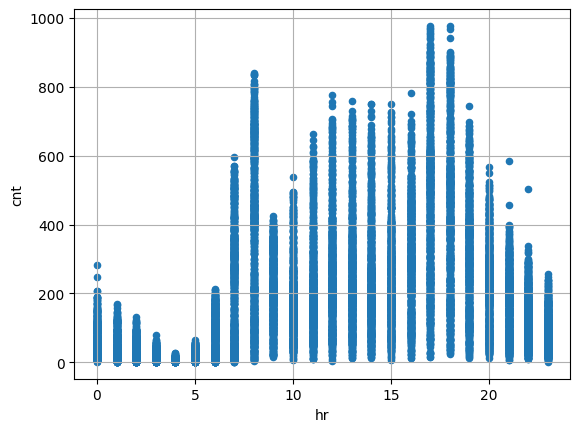

In [ ]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
df_bike_cnt.plot(kind="scatter", x="hr", y="cnt", grid=True)
plt.show()

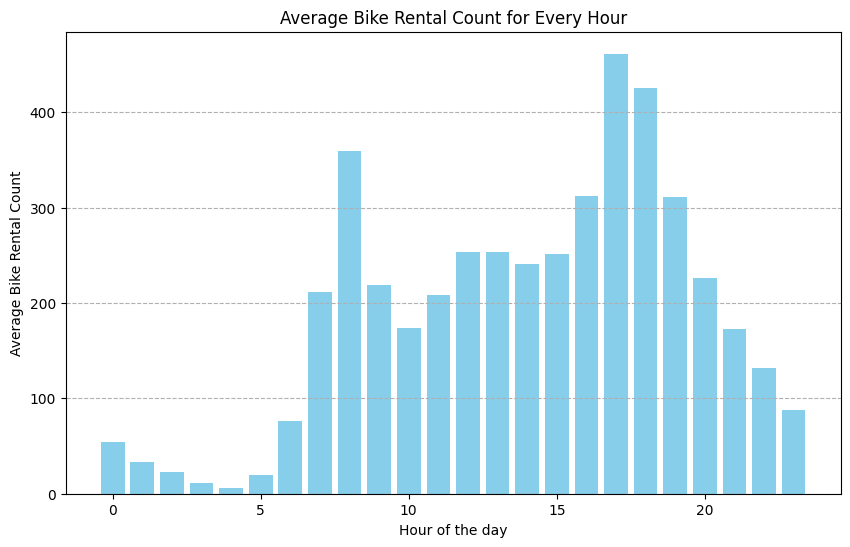

In [ ]:

# Calculating average bike rent count for each hour to find busy hours
average_cnt_per_hr = df_bike_cnt.groupby('hr')['cnt'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_cnt_per_hr['hr'], average_cnt_per_hr['cnt'], color='skyblue')
plt.xlabel('Hour of the day')
plt.ylabel('Average Bike Rental Count')
plt.title('Average Bike Rental Count for Every Hour')
plt.grid(axis='y', linestyle='--')
plt.show()

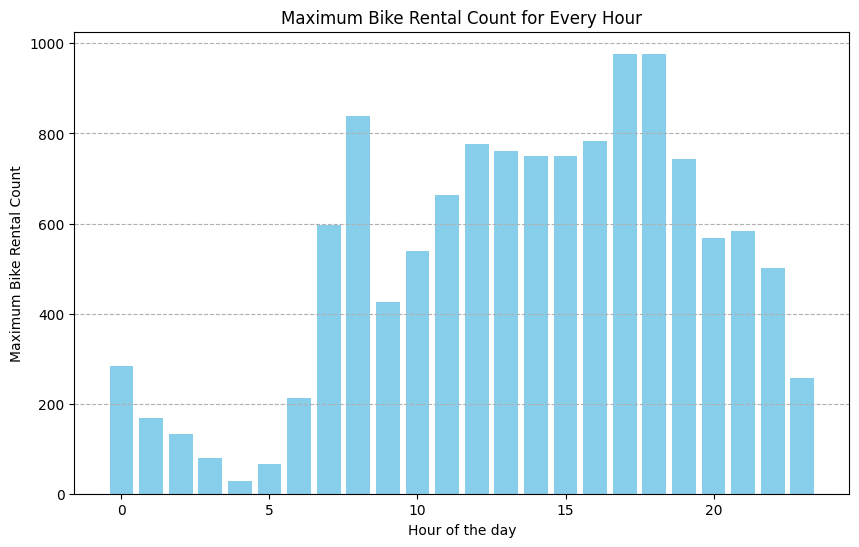

In [ ]:
# Calculating maximum bike rent count for each hour to find demand spikes
max_cnt_per_hr = df_bike_cnt.groupby('hr')['cnt'].max().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(max_cnt_per_hr['hr'], max_cnt_per_hr['cnt'], color='skyblue')
plt.xlabel('Hour of the day')
plt.ylabel('Maximum Bike Rental Count')
plt.title('Maximum Bike Rental Count for Every Hour')
plt.grid(axis='y', linestyle='--')
plt.show()

### **Busy hours are 8am-9am, 5pm-6pm and 6pm-7pm. (both average and max plots seem to indicate this).**

**Priyanka**- The busiest hour for the average count of bike sharing for all users is 17hr-18hr.
Since the demand is high during 8 hrs , 17 and 18hrs, the bike sharing company can apply surge pricing, while during off peak hours, the company can offer discounted rides to gain user trust and this can be straegy for customr retention.Also,based on the hourly average demand prediction, the company can decide the fleet availaibility during the peak hours.

#### Visualize the distribution of count, casual and registered variables

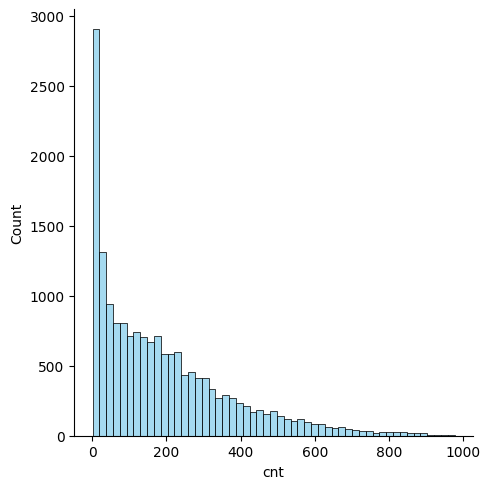

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
sns.displot(df_bike_cnt['cnt'], kde=False, color='skyblue')

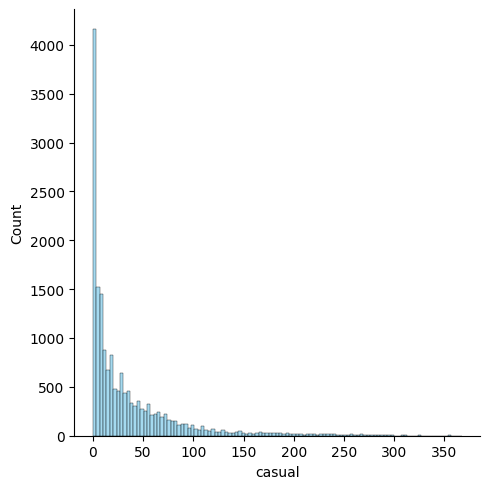

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
sns.displot(df_bike_cnt['casual'], kde=False, color='skyblue')

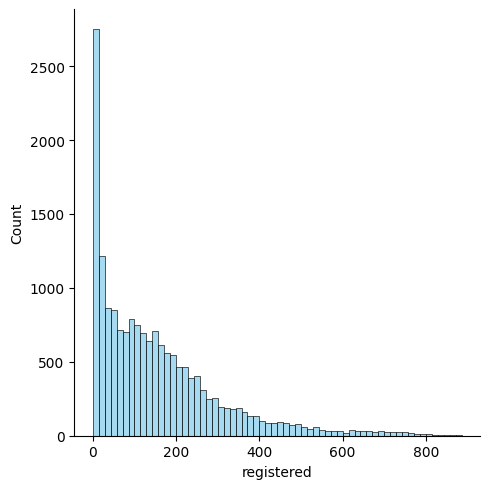

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
sns.displot(df_bike_cnt['registered'], kde=False, color='skyblue')

**Priyanka** -We observe that the overall count of the bike sharing is mainly driven by the registered users. However, there is potential to convert the casual users to registered users by offering them promotional offers.

#### Describe the relation of weekday, holiday and working day

In [ ]:
# YOUR CODE HERE
df_bike_cnt["weekday"].value_counts()


6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [ ]:
df_bike_cnt["holiday"].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [ ]:
df_bike_cnt["workingday"].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

## **If not a holiday or a weekend day, it is a working day.**
##** Weekend days have weekday value as 0 (Sunday) or 6 (Saturday).**

In [ ]:
nCountHolidayOrWeekend = df_bike_cnt[(df_bike_cnt['holiday'] == True) | (df_bike_cnt['weekday'].isin([0, 6]))].shape[0]

In [ ]:
nCountHolidayOrWeekend

5514

In [ ]:
nCountNonWorkingDay = df_bike_cnt[(~(df_bike_cnt['workingday'] == True))].shape[0]
nCountNonWorkingDay

5514

In [ ]:
nCount = df_bike_cnt[((df_bike_cnt['holiday'] == True) | (df_bike_cnt['weekday'].isin([0, 6]))) & (df_bike_cnt['workingday'] == True)].shape[0]
nCount

0

### **This verifies that non-working day is holiday or weekend day. All others are working days. **

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

Text(0, 0.5, 'Bike Rentals')

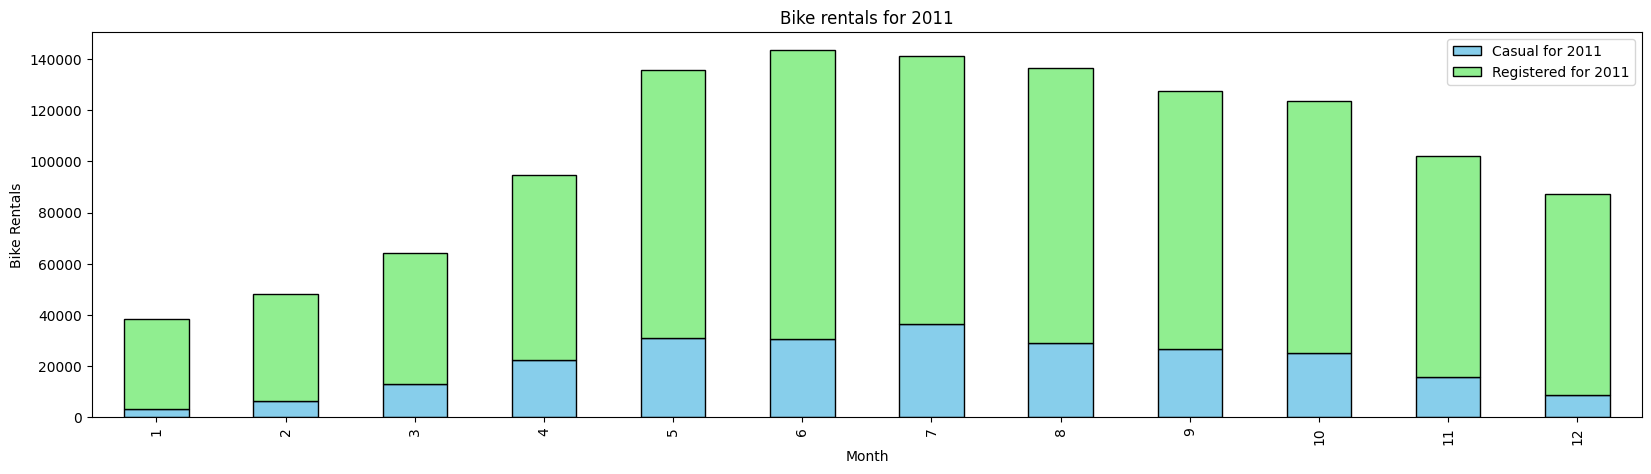

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
df_2011_casual = df_bike_cnt[df_bike_cnt['yr'] == 0].groupby(['mnth'])['casual'].sum()
df_2011_registered = df_bike_cnt[df_bike_cnt['yr'] == 0].groupby(['mnth'])['registered'].sum()
df = pd.DataFrame({'Casual for 2011': df_2011_casual,
                    'Registered for 2011': df_2011_registered})
ax = df.plot(kind='bar',stacked=True, color=['skyblue', 'lightgreen'],edgecolor='black', figsize=(20, 5), title = 'Bike rentals for 2011')
ax.set_xlabel('Month')
ax.set_ylabel('Bike Rentals')

**Priyanka**: The count of bike rentals for 2011 has a gradually increasing trend starting from January ,with a considerable jump in the month of May with the highest rentals being in the month of June and maintains the numbers through the months of July and August and gradually decreases from September.While the number of registered users remains fairly consistent throughout the year compared to the casual users whose numbers are high mostly between April to September

Text(0, 0.5, 'Bike Rentals')

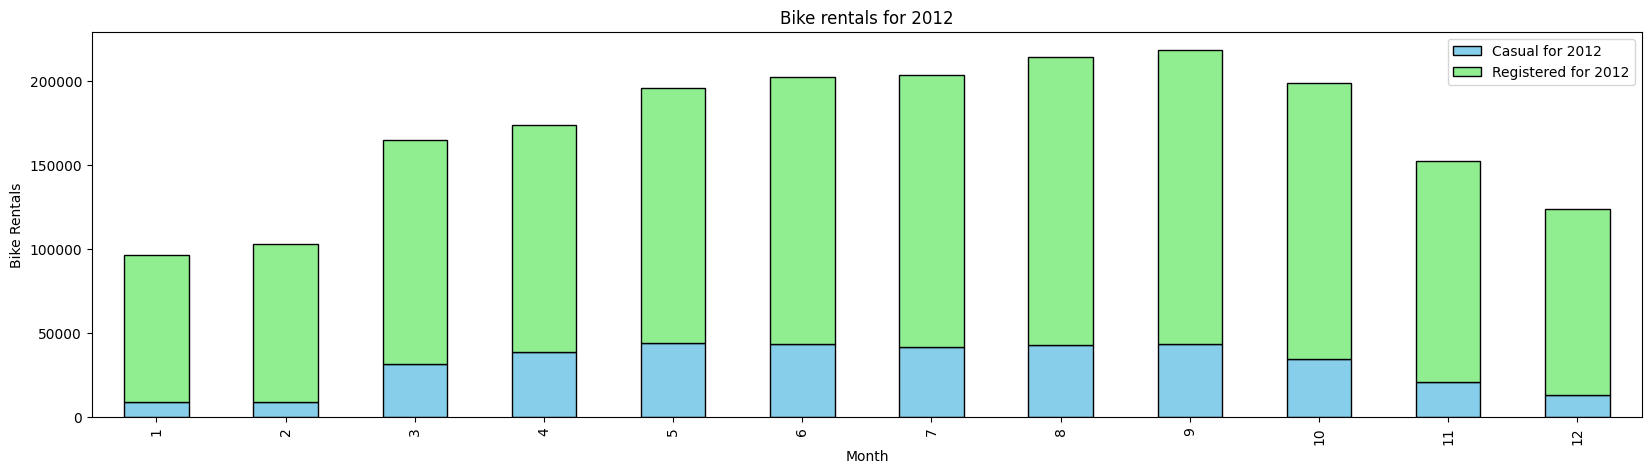

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df_2012_casual = df_bike_cnt[df_bike_cnt['yr'] == 1].groupby(['mnth'])['casual'].sum()
df_2012_registered = df_bike_cnt[df_bike_cnt['yr'] == 1].groupby(['mnth'])['registered'].sum()
df = pd.DataFrame({'Casual for 2012': df_2012_casual,
                    'Registered for 2012': df_2012_registered})
ax = df.plot(kind='bar',stacked=True, color=['skyblue', 'lightgreen'],edgecolor='black', figsize=(20, 5), title = 'Bike rentals for 2012')
ax.set_xlabel('Month')
ax.set_ylabel('Bike Rentals')

**Priyanka**: The count of bike rentals for the year 2012 shows a increasing trend from the month 1(January) and it is highest in the 9th month(September) post which the count follows a downward trend.While the number of registered users remains fairly high throughout the year compared to the casual users whose numbers are high mostly between April to September

#### Analyze the correlation between features with heatmap

*   List item
*   List item



<ipython-input-24-9f0318ad9c0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_bike_cnt.corr().round(1)


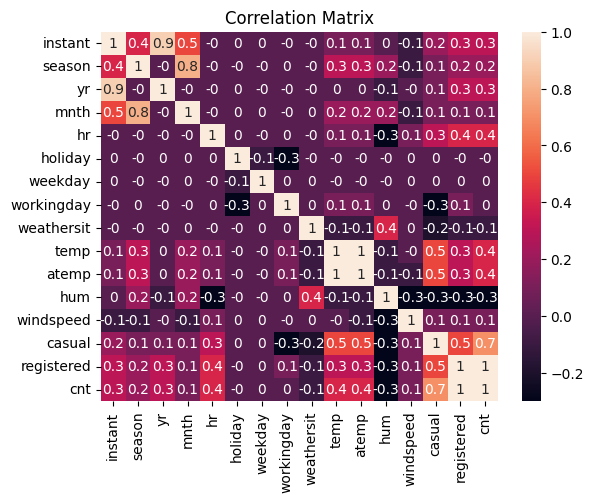

In [ ]:
# YOUR CODE HERE
corr_matrix = df_bike_cnt.corr().round(1)
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Priyanka** We can infer from the above heatmap that the variables registered and cnt are highly correlated.Similarly temp and atemp are highly correlated.Also there is some correlation between season and month

#### Visualize the box plot of casual and registered variables to check the outliers

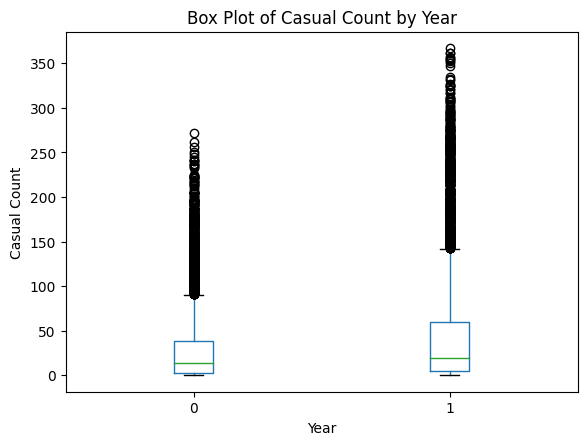

In [ ]:
# YOUR CODE HERE
boxplot = df_bike_cnt.boxplot(by='yr', column=['casual'], grid=False)
plt.title(f'Box Plot of Casual Count by Year')
plt.suptitle('')  # Remove the default title for 'by'
plt.xlabel('Year')
plt.ylabel('Casual Count')
plt.show()

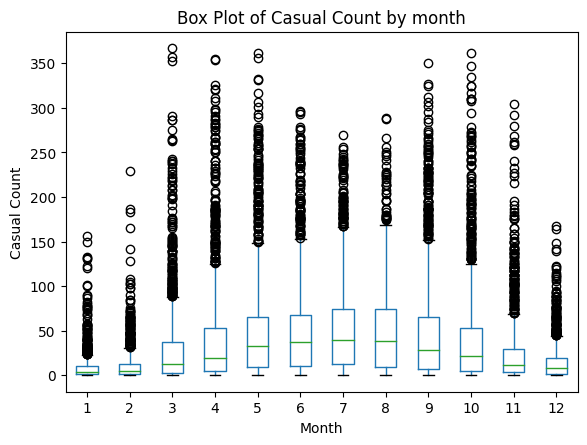

In [ ]:
boxplot = df_bike_cnt.boxplot(by='mnth', column=['casual'], grid=False)
plt.title(f'Box Plot of Casual Count by month')
plt.suptitle('')  # Remove the default title for 'by'
plt.xlabel('Month')
plt.ylabel('Casual Count')
plt.show()



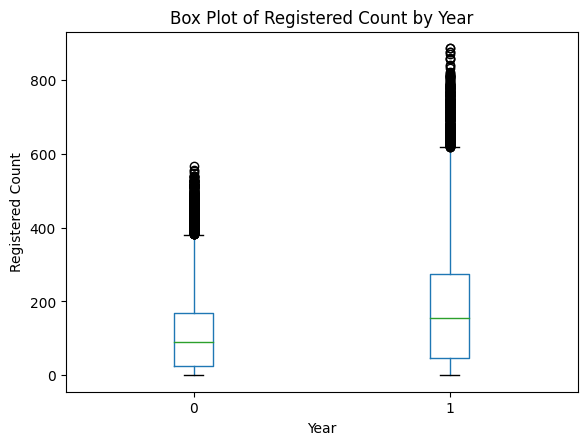

In [ ]:
# YOUR CODE HERE
boxplot = df_bike_cnt.boxplot(by='yr', column=['registered'], grid=False)
plt.title(f'Box Plot of Registered Count by Year')
plt.suptitle('')  # Remove the default title for 'by'
plt.xlabel('Year')
plt.ylabel('Registered Count')
plt.show()

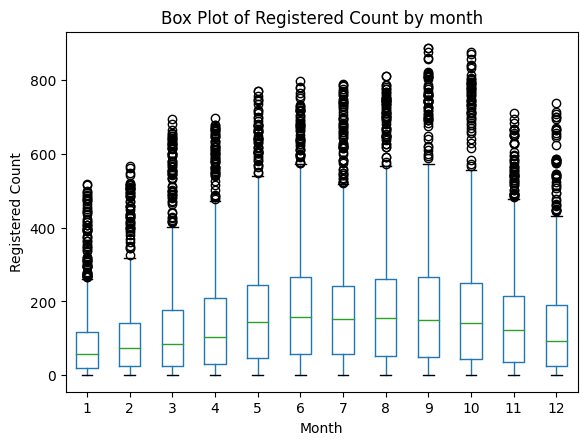

In [ ]:
boxplot = df_bike_cnt.boxplot(by='mnth', column=['registered'], grid=False)
plt.title(f'Box Plot of Registered Count by month')
plt.suptitle('')  # Remove the default title for 'by'
plt.xlabel('Month')
plt.ylabel('Registered Count')
plt.show()


<ipython-input-29-85b9aa1dddfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'season', y = 'casual', data = df_bike_cnt, palette="deep")
<ipython-input-29-85b9aa1dddfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'mnth', y = 'casual', data = df_bike_cnt, palette = "bright")
<ipython-input-29-85b9aa1dddfb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'weathersit', y = 'casual', data = df_bike_cnt, palette = "pastel")
<ipython-input-29-85b9aa1dddfb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is depre

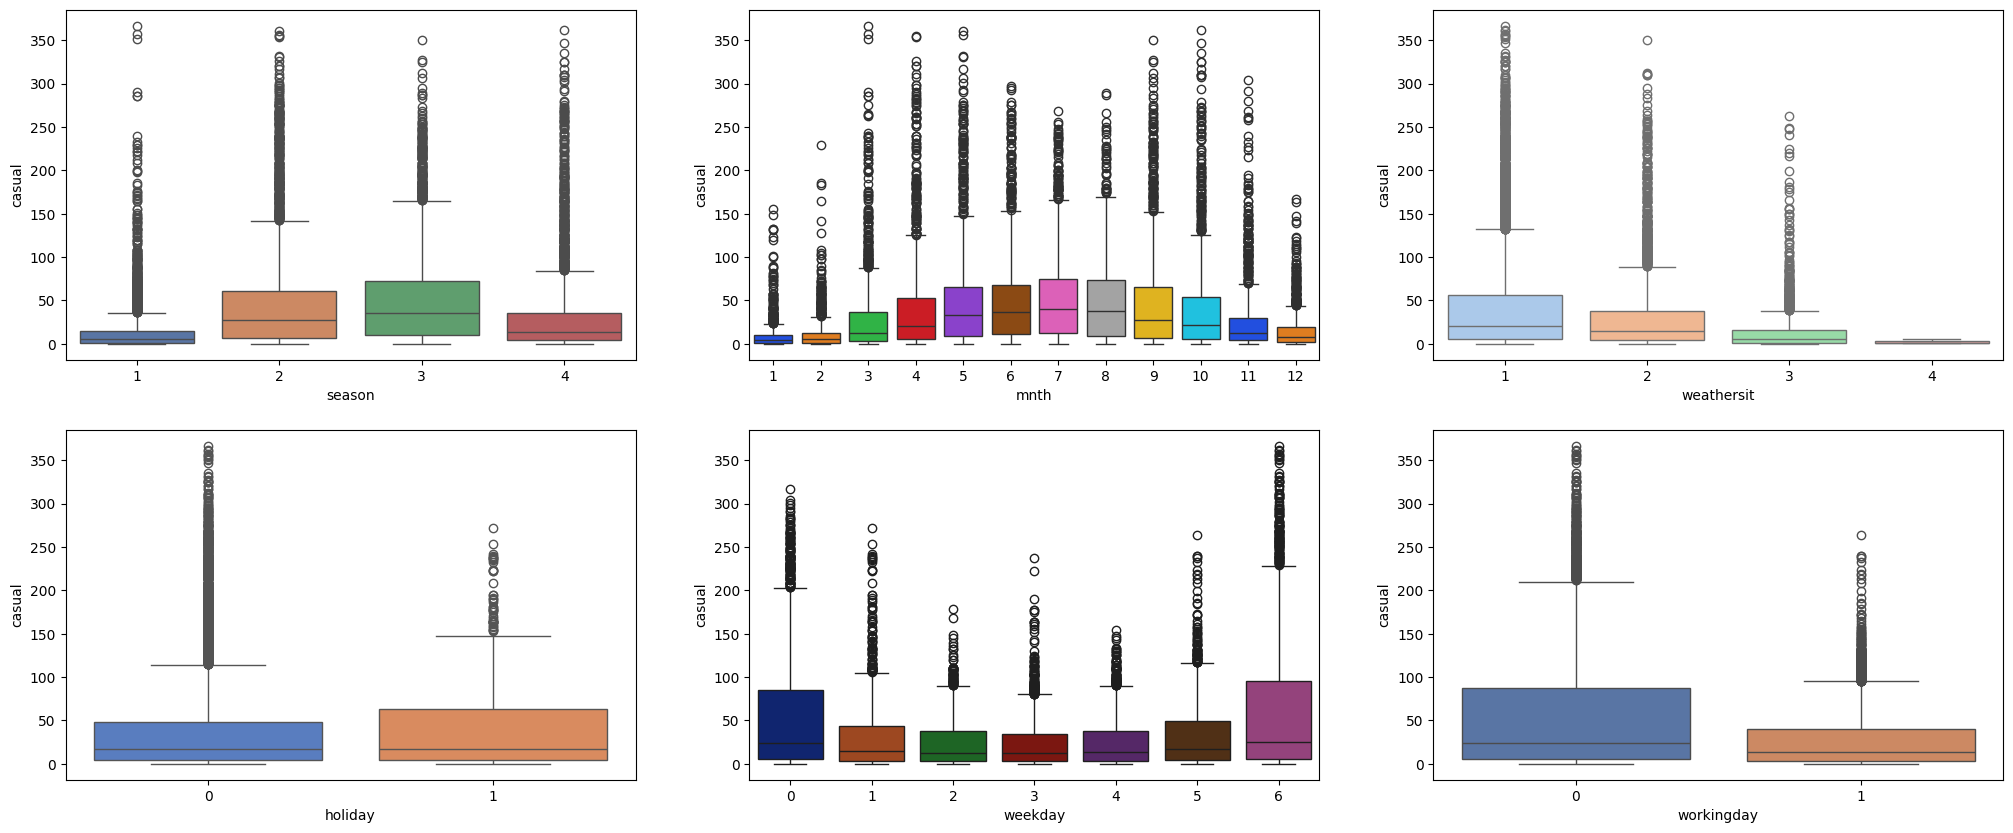

In [ ]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'casual', data = df_bike_cnt, palette="deep")
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'casual', data = df_bike_cnt, palette = "bright")
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'casual', data = df_bike_cnt, palette = "pastel")
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'casual', data = df_bike_cnt, palette = "muted")
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'casual', data = df_bike_cnt, palette = "dark")
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'casual', data = df_bike_cnt, palette = "deep")
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

### We can drop instant column as index covers that.
### We can drop dteday as variation for a month and year is covered separately. Variation based on a unique date is not useful for future prediction.
### STAN-ToDo: Why zero correlation for weekday etc.
### We can drop casual and registered columns as we are interested in predicting overall count (cnt).

In [ ]:
# YOUR CODE HERE
df_bike_cnt_original = df_bike_cnt.copy()
df_bike_cnt_compact = df_bike_cnt.drop(["instant", 'dteday','casual','registered'], axis=1)
df_bike_cnt_compact.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


#### Identify categorical and continuous variables


Categorical columns can be identified based on data type, unique values of the column, data dictionary and domain knowledge.

Based on problem domain and data dictionary (in the link for the dataset), we know that dteday, season, yr, month, hr, weathersit are categorical variables.

In [ ]:
# YOUR CODE HERE
categorical_columns = df_bike_cnt_compact.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index([], dtype='object')


### Checking unique values

In [ ]:
unique_values_season = df_bike_cnt_compact['season'].unique()
print("Values for season", unique_values_season,"\n")
unique_values_yr = df_bike_cnt_compact['yr'].unique()
print("Values for year", unique_values_yr,"\n")
unique_values_mnth = df_bike_cnt_compact['mnth'].unique()
print("Values for mnth", unique_values_mnth,"\n")
unique_values_hr = df_bike_cnt_compact['hr'].unique()
print("Values for hr", unique_values_hr,"\n")
unique_values_weathersit = df_bike_cnt_compact['weathersit'].unique()
print("Values for weathersit", unique_values_weathersit,"\n")
unique_values_weekday = df_bike_cnt_compact['weekday'].unique()
print("Values for weekday", unique_values_weekday,"\n")
unique_values_holiday = df_bike_cnt_compact['holiday'].unique()
print("Values for holiday", unique_values_holiday,"\n")
unique_values_workingday = df_bike_cnt_compact['workingday'].unique()
print("Values for workingday", unique_values_workingday,"\n")

Values for season [1 2 3 4] 

Values for year [0 1] 

Values for mnth [ 1  2  3  4  5  6  7  8  9 10 11 12] 

Values for hr [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

Values for weathersit [1 2 3 4] 

Values for weekday [6 0 1 2 3 4 5] 

Values for holiday [0 1] 

Values for workingday [0 1] 



Categorical variables are season, yr, mnth, hr, weathersit, weekday, holiday and workingday

Continuous variables are temp, atemp, hum and windspeed

In [ ]:
categorical_vars = ['season','yr','mnth','hr','weathersit', 'weekday', 'holiday', 'workingday']
continuous_vars = ['temp','atemp','hum','windspeed']

In [ ]:
df_bike_cnt_compact[continuous_vars].describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



### Stan-ToDo: Need to give reasons for the scaler chosen, try min max also

In [ ]:
# YOUR CODE HERE
# Apply StandardScaler to continuous numerical variables
scaler = StandardScaler()
df_bike_cnt_compact[continuous_vars] = scaler.fit_transform(df_bike_cnt_compact[continuous_vars])

# Display the scaled DataFrame
print(df_bike_cnt_compact.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1   0        0        6           0           1 -1.334648   
1       1   0     1   1        0        6           0           1 -1.438516   
2       1   0     1   2        0        6           0           1 -1.438516   
3       1   0     1   3        0        6           0           1 -1.334648   
4       1   0     1   4        0        6           0           1 -1.334648   

      atemp       hum  windspeed  cnt  
0 -1.093281  0.947372  -1.553889   16  
1 -1.181732  0.895539  -1.553889   40  
2 -1.181732  0.895539  -1.553889   32  
3 -1.093281  0.636370  -1.553889   13  
4 -1.093281  0.636370  -1.553889    1  


**Priyanka**: Since from the boxplots, we can see the number of outliers are quite high, we are using standard scalar instead of a minmax scaler

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
#Stan-ToDo:  Need to try sinusoidal encoders
# Initialize OneHotEncoder
encoder1Hot = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
df_bike_cnt_compact_1Hot = pd.DataFrame(encoder1Hot.fit_transform(df_bike_cnt_compact[categorical_vars]),\
                                        columns=encoder1Hot.get_feature_names_out(categorical_vars))

# Concatenate the one-hot encoded features with the original DataFrame
df_new = pd.concat([df_bike_cnt_compact, df_bike_cnt_compact_1Hot], axis=1)
print(df_new.head)

<bound method NDFrame.head of        season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0           1   0     1   0        0        6           0           1   
1           1   0     1   1        0        6           0           1   
2           1   0     1   2        0        6           0           1   
3           1   0     1   3        0        6           0           1   
4           1   0     1   4        0        6           0           1   
...       ...  ..   ...  ..      ...      ...         ...         ...   
17374       1   1    12  19        0        1           1           2   
17375       1   1    12  20        0        1           1           2   
17376       1   1    12  21        0        1           1           1   
17377       1   1    12  22        0        1           1           1   
17378       1   1    12  23        0        1           1           1   

           temp     atemp  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0     -1.334648

#### Specify features and targets after applying scaling and one-hot encoding
### STAN-ToDo: This section needs to be done

In [ ]:
# YOUR CODE HERE
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        17379 non-null  int64  
 1   yr            17379 non-null  int64  
 2   mnth          17379 non-null  int64  
 3   hr            17379 non-null  int64  
 4   holiday       17379 non-null  int64  
 5   weekday       17379 non-null  int64  
 6   workingday    17379 non-null  int64  
 7   weathersit    17379 non-null  int64  
 8   temp          17379 non-null  float64
 9   atemp         17379 non-null  float64
 10  hum           17379 non-null  float64
 11  windspeed     17379 non-null  float64
 12  cnt           17379 non-null  int64  
 13  season_1      17379 non-null  float64
 14  season_2      17379 non-null  float64
 15  season_3      17379 non-null  float64
 16  season_4      17379 non-null  float64
 17  yr_0          17379 non-null  float64
 18  yr_1          17379 non-nu

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
categorical_vars

['season',
 'yr',
 'mnth',
 'hr',
 'weathersit',
 'weekday',
 'holiday',
 'workingday']

In [ ]:
# YOUR CODE HERE
df_new = df_new.drop(categorical_vars, axis=1)
y = df_new['cnt']
X = df_new.drop(['cnt'], axis=1)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          17379 non-null  float64
 1   atemp         17379 non-null  float64
 2   hum           17379 non-null  float64
 3   windspeed     17379 non-null  float64
 4   season_1      17379 non-null  float64
 5   season_2      17379 non-null  float64
 6   season_3      17379 non-null  float64
 7   season_4      17379 non-null  float64
 8   yr_0          17379 non-null  float64
 9   yr_1          17379 non-null  float64
 10  mnth_1        17379 non-null  float64
 11  mnth_2        17379 non-null  float64
 12  mnth_3        17379 non-null  float64
 13  mnth_4        17379 non-null  float64
 14  mnth_5        17379 non-null  float64
 15  mnth_6        17379 non-null  float64
 16  mnth_7        17379 non-null  float64
 17  mnth_8        17379 non-null  float64
 18  mnth_9        17379 non-nu

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
import scipy.linalg
theta = scipy.linalg.lstsq(X_train, y_train, cond=None)[0]
print(theta)

[ 2.16945545e+01  2.12253022e+01 -1.57979325e+01 -3.78441408e+00
 -3.42200147e+12 -3.42200147e+12 -3.42200147e+12 -3.42200147e+12
  1.06193606e+12  1.06193606e+12  1.85731269e+12  1.85731269e+12
  1.85731269e+12  1.85731269e+12  1.85731269e+12  1.85731269e+12
  1.85731269e+12  1.85731269e+12  1.85731269e+12  1.85731269e+12
  1.85731269e+12  1.85731269e+12  8.13838366e+10  8.13838365e+10
  8.13838365e+10  8.13838365e+10  8.13838365e+10  8.13838365e+10
  8.13838366e+10  8.13838367e+10  8.13838369e+10  8.13838367e+10
  8.13838367e+10  8.13838367e+10  8.13838367e+10  8.13838367e+10
  8.13838367e+10  8.13838367e+10  8.13838368e+10  8.13838369e+10
  8.13838369e+10  8.13838368e+10  8.13838367e+10  8.13838367e+10
  8.13838366e+10  8.13838366e+10  4.33631322e+12  4.33631322e+12
  4.33631322e+12  4.33631322e+12  3.28610507e+12  1.18109050e+11
  1.18109050e+11  1.18109050e+11  1.18109050e+11  1.18109050e+11
  3.28610507e+12 -7.88234726e+12 -4.71435124e+12  6.81297852e+11
  3.84929387e+12]


In [ ]:
theta_np = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
print(theta_np)

[  21.7180535    21.20273101  -15.79764174   -3.7879814   -18.33520531
   15.52872885   12.02591501   50.0059247   -13.37925886   72.60462211
   -3.3699037    -1.38709205   11.40898103    7.70493308   20.71938085
    8.84277971  -11.85275495    6.53488109   33.40457673   13.13423091
  -14.8823752   -11.03227426 -122.96576705 -139.80881826 -150.18476669
 -160.23721076 -162.64989887 -144.63264131  -87.91794976   49.02400395
  193.24964272   41.25700919  -11.7037882    10.92094928   53.54752219
   49.08647306   27.80674043   36.91160155  102.82357032  259.77194417
  219.57058331  112.97219001   36.79998354  -13.53763814  -50.94188903
  -89.93648238   65.65540559   54.45572487    1.08681671  -61.97258392
   -1.88618476    5.94924529    7.57196447    9.66119686    9.13934784
   14.30172101   14.48807256   42.53642131   16.68894194   29.29082973
   29.93453352]


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
# YOUR CODE HERE

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 10084.05


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.68


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [ ]:
# YOUR CODE HERE
reg.coef_

array([ 2.17685426e+01,  2.11650317e+01, -1.57944515e+01, -3.82736636e+00,
        6.30242857e+12,  6.30242857e+12,  6.30242857e+12,  6.30242857e+12,
       -2.91058081e+13, -2.91058081e+13,  4.18742278e+13,  4.18742278e+13,
        4.18742278e+13,  4.18742278e+13,  4.18742278e+13,  4.18742278e+13,
        4.18742278e+13,  4.18742278e+13,  4.18742278e+13,  4.18742278e+13,
        4.18742278e+13,  4.18742278e+13,  2.31054588e+13,  2.31054588e+13,
        2.31054588e+13,  2.31054588e+13,  2.31054588e+13,  2.31054588e+13,
        2.31054588e+13,  2.31054588e+13,  2.31054588e+13,  2.31054588e+13,
        2.31054588e+13,  2.31054588e+13,  2.31054588e+13,  2.31054588e+13,
        2.31054588e+13,  2.31054588e+13,  2.31054588e+13,  2.31054588e+13,
        2.31054588e+13,  2.31054588e+13,  2.31054588e+13,  2.31054588e+13,
        2.31054588e+13,  2.31054588e+13, -1.51391270e+13, -1.51391270e+13,
       -1.51391270e+13, -1.51391270e+13, -3.03364364e+13,  6.55649368e+13,
        6.55649368e+13,  

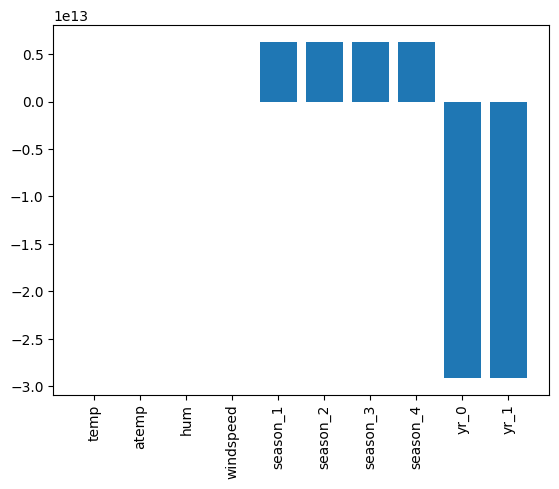

In [ ]:
plt.bar(range(len(reg.coef_[0:10])), reg.coef_[0:10])
plt.xticks(range(len(reg.coef_[0:10])), X_train.columns[0:10], rotation=90)
plt.show()
#STAN-ToDo Need to complete the coefficient bar graphs for other features also

In [ ]:
X_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'holiday_0', 'holiday_1', 'workingday_0',
       'workingday_1'],
      dtype='object')

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE
LassoMSEs = {}
LassoR2s = {}
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
for param in alpha:
    reg = linear_model.Lasso(alpha=param)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    LassoMSEs[param] = mean_squared_error(y_test, y_pred)
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    LassoR2s[param] = r2_score(y_test, y_pred)

alpha_with_lowest_MSE = min(LassoMSEs, key=LassoMSEs.get)
print(f"Lasso: Best alpha with lowest error = {alpha_with_lowest_MSE}")

print(f"Lasso: Corresponding Coefficient of determination = {round(LassoR2s[alpha_with_lowest_MSE],2)}")


Mean squared error: 10089.28
Coefficient of determination: 0.68
Mean squared error: 10088.31
Coefficient of determination: 0.68
Mean squared error: 10080.99
Coefficient of determination: 0.68
Mean squared error: 10074.87
Coefficient of determination: 0.68
Mean squared error: 10726.17
Coefficient of determination: 0.66
Mean squared error: 22662.13
Coefficient of determination: 0.28
Mean squared error: 31696.43
Coefficient of determination: -0.00
Lasso: Best alpha with lowest error = 0.1
Lasso: Corresponding Coefficient of determination = 0.68


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE
RidgeMSEs = {}
RidgeR2s = {}
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
for param in alpha:
    reg = linear_model.Ridge(alpha=param)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    RidgeMSEs[param] = mean_squared_error(y_test, y_pred)
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    RidgeR2s[param] = r2_score(y_test, y_pred)

alpha_with_lowest_MSE = min(RidgeMSEs, key=RidgeMSEs.get)
print(f"Ridge: Best alpha with lowest error = {alpha_with_lowest_MSE}")

print(f"Ridge: Corresponding Coefficient of determination = {round(RidgeR2s[alpha_with_lowest_MSE],2)}")

Mean squared error: 10089.39
Coefficient of determination: 0.68
Mean squared error: 10089.38
Coefficient of determination: 0.68
Mean squared error: 10089.33
Coefficient of determination: 0.68
Mean squared error: 10088.84
Coefficient of determination: 0.68
Mean squared error: 10085.20
Coefficient of determination: 0.68
Mean squared error: 10074.77
Coefficient of determination: 0.68
Mean squared error: 10341.91
Coefficient of determination: 0.67
Ridge: Best alpha with lowest error = 10
Ridge: Corresponding Coefficient of determination = 0.68


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE
ElasticNetMSEs = {}
ElasticNetR2s = {}
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
for param in alpha:
    reg = linear_model.ElasticNet(alpha=param, l1_ratio=0.5)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    ElasticNetMSEs[param] = mean_squared_error(y_test, y_pred)
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    ElasticNetR2s[param] = r2_score(y_test, y_pred)

alpha_with_lowest_MSE = min(ElasticNetMSEs, key=ElasticNetMSEs.get)
print(f"ElasticNet: Best alpha with lowest error = {alpha_with_lowest_MSE}")

print(f"ElasticNet: Corresponding Coefficient of determination = {round(ElasticNetR2s[alpha_with_lowest_MSE],2)}")

Mean squared error: 10086.00
Coefficient of determination: 0.68
Mean squared error: 10076.16
Coefficient of determination: 0.68
Mean squared error: 10206.97
Coefficient of determination: 0.68
Mean squared error: 13793.66
Coefficient of determination: 0.56
Mean squared error: 21083.54
Coefficient of determination: 0.33
Mean squared error: 27962.86
Coefficient of determination: 0.12
Mean squared error: 31547.98
Coefficient of determination: 0.00
ElasticNet: Best alpha with lowest error = 0.001
ElasticNet: Corresponding Coefficient of determination = 0.68


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
